# Airplane Capital Budgeting Monte Carlo Problem

# The Basic Model

Before we get to the Monte Carlo part or bringing in any of the distributions, we just want to be able to get the base NPV for a plane. To get there, we will need to find the cash flows of the plane. We already have the research and manufacture costs as our $t=0$ and $t=1$ cash flows. So then it's just figuring out the $t=2$ cash flow. 

## Getting the $t=2$ Cash Flow

For this cash flow, it will simply be: $$\pi = PQ$$ Where $\pi$ is the profit, $P$ is the price, and $Q$ is the quantity of planes sold.

In [1]:
num_units = 100
price = 1000000

profit = price * num_units
profit

100000000

## Putting the Cash Flows Together

At $t=0$, we pay the research cost, and at $t=1$, we pay the manufacture cost. Just add the $t=2$ cash flow we added to these and we will have all the cash flows for the plane.

In [2]:
research_cost = 10000000
manufacture_cost = 2000000

cash_flows = [
    -research_cost,
    -manufacture_cost * num_units,
    price * num_units
]
cash_flows

[-10000000, -200000000, 100000000]

## Calculating NPV

`numpy` has an NPV function to calculate this for us. Recall that `numpy`'s NPV function expects the first cash flow to be period 0, which is what we have, so we can pass the cash flows directly in.

In [3]:
import numpy as np

interest_rate = 0.07

np.npv(interest_rate, cash_flows)

-109572015.02314611

## Representing a Plane

We know we're going to have multiple different planes to evaluate. It would be nice to have a defined way to organize these planes together. Let's create a Plane class for this. It will just accept the inputs and do the calculations we have already done.

In [4]:
class Plane:
    
    def __init__(self, name='Super Size', research_cost=100000000, manufacture_cost=10000000, sale_price=20000000, num_units=200, interest_rate=0.07):
        self.name = name
        self.research_cost = research_cost
        self.manufacture_cost = manufacture_cost
        self.sale_price = sale_price
        self.num_units = num_units
        self.interest_rate = interest_rate
        
    def profit(self):
        return self.sale_price * self.num_units
    
    def total_manufacture_cost(self):
        return self.manufacture_cost * self.num_units
    
    def cash_flows(self):
        return [
            -self.research_cost,
            -self.total_manufacture_cost(),
            self.profit()
        ]
    
    def npv(self):
        return np.npv(self.interest_rate, self.cash_flows())
    
plane = Plane()
print(f'The {plane.name} plane has {plane.cash_flows()} cash flows and {plane.npv()} NPV')

The Super Size plane has [-100000000, -2000000000, 4000000000] cash flows and 1524596034.5881736 NPV


# Monte Carlo Simulations

## Getting Random Interest Rates and Units

Now we have the basic model set up in the Plane class. Now for each type of plane, we want to assign a distribution to both the number of units sold and the interest rate. 

In [5]:
import random

interest_rate_mean = 0.07
interest_rate_stdev = 0.04

interest_rate = random.normalvariate(interest_rate_mean, interest_rate_stdev)
interest_rate

0.05068405683449734

One snag with the units is we can't sell a partial plane. So we'll also round it. Further, we can't sell negative planes, so we will take the max of 0 and the number of planes.

In [6]:
num_units_mean = 200
num_units_stdev = 40

num_units = random.normalvariate(num_units_mean, num_units_stdev)
num_units

214.93413410680432

In [7]:
round(num_units)

215

In [8]:
max(0, round(num_units))

215

## Running a Simulation

To run one simulation, we need to pick those random values for units and interest rate and then pass them into the plane and collect the NPV. As you run this multiple times, you can see the NPV change.

In [9]:
interest_rate = random.normalvariate(interest_rate_mean, interest_rate_stdev)
num_units = random.normalvariate(num_units_mean, num_units_stdev)
num_units = max(0, round(num_units))
ss_plane = Plane(
    name='Super Size',
    research_cost=100000000,
    manufacture_cost=10000000, 
    sale_price=20000000, 
    num_units=num_units, 
    interest_rate=interest_rate
)
ss_plane.npv()

1225111127.370677

We're going to have to run this for each plane 10,000 times. So let's make a function for this to stay organized. We also want to return the interest rate and number of units used for later analysis.

In [10]:
def plane_simulation(plane_name, research_cost, manufacture_cost, sale_price, num_units_mean, num_units_stdev, interest_rate_mean=0.07, interest_rate_stdev=0.04):
    interest_rate = random.normalvariate(interest_rate_mean, interest_rate_stdev)
    num_units = random.normalvariate(num_units_mean, num_units_stdev)
    num_units = max(0, round(num_units))
    plane = Plane(
        name=plane_name,
        research_cost=research_cost,
        manufacture_cost=manufacture_cost, 
        sale_price=sale_price, 
        num_units=num_units, 
        interest_rate=interest_rate
    )
    return plane.npv(), interest_rate, num_units

plane_simulation(
    'Large',
    50000000,
    5000000,
    10000000,
    400,
    30
)

(1240786954.9344127, 0.14771899733491675, 399)

## Running all the Simulations for One Plane

Now we have a function that runs a single simulation for a single plane. So now we want to run 10,000 of these for that plane.

In [11]:
num_simulations = 10000
plane_name = 'Large'
research_cost = 50000000
manufacture_cost = 5000000
sale_price = 10000000
num_units_mean = 400
num_units_stdev = 30

npvs = []
interest_rates = []
all_num_units = []
for i in range(num_simulations):
    npv, interest_rate, num_units = plane_simulation(
        plane_name, research_cost, manufacture_cost,
        sale_price, num_units_mean, num_units_stdev
    )
    npvs.append(npv)
    interest_rates.append(interest_rate)
    all_num_units.append(num_units)


In [12]:
len(interest_rates)

10000

In [13]:
interest_rates[:5]

[0.07976664988245984,
 0.038943475992439705,
 0.06062607531659303,
 0.0647276697712812,
 0.14555781029754047]

In [14]:
len(npvs)

10000

In [15]:
npvs[:5]

[1354941210.572429,
 1877626958.0497549,
 1490672289.1898499,
 1670152949.1062102,
 1213136814.508238]

In [16]:
len(all_num_units)

10000

In [17]:
all_num_units[:5]

[356, 433, 369, 417, 388]

Everything looks right, so now let's put it into a `DataFrame`.

In [18]:
import pandas as pd

df = pd.DataFrame()
df['NPV'] = npvs
df['Interest Rate'] = interest_rates
df['Number Units Sold'] = all_num_units
df['Plane Name'] = plane_name

df.head()  # view first rows

,NPV,Interest Rate,Number Units Sold,Plane Name
0,1.354941e+09,0.079767,356,Large
1,1.877627e+09,0.038943,433,Large
2,1.490672e+09,0.060626,369,Large
3,1.670153e+09,0.064728,417,Large
4,1.213137e+09,0.145558,388,Large


In [19]:
len(df)

10000

In [20]:
df.describe()

,NPV,Interest Rate,Number Units Sold
count,1.000000e+04,10000.000000,10000.000000
mean,1.586780e+09,0.070358,400.460200
std,2.291758e+08,0.039938,29.889449
min,8.944963e+08,-0.093185,292.000000
25%,1.426990e+09,0.043804,380.000000
50%,1.571725e+09,0.070373,401.000000
75%,1.731635e+09,0.097278,421.000000
max,2.592085e+09,0.231753,509.000000


Everything looks right. So now let's wrap this up in a function.

In [21]:
def plane_simulations(plane_name, research_cost, manufacture_cost, sale_price, num_units_mean, num_units_stdev, interest_rate_mean=0.07, interest_rate_stdev=0.04, num_simulations=10000):
    npvs = []
    interest_rates = []
    all_num_units = []
    for i in range(num_simulations):
        npv, interest_rate, num_units = plane_simulation(
            plane_name, research_cost, manufacture_cost,
            sale_price, num_units_mean, num_units_stdev,
            interest_rate_mean=interest_rate_mean,
            interest_rate_stdev=interest_rate_stdev
        )
        npvs.append(npv)
        interest_rates.append(interest_rate)
        all_num_units.append(num_units)
        
    df = pd.DataFrame()
    df['NPV'] = npvs
    df['Interest Rate'] = interest_rates
    df['Number Units Sold'] = all_num_units
    df['Plane Name'] = plane_name
    return df

df = plane_simulations(
    'test plane',
    500,
    10,
    15,
    100,
    100
)
df.head()

,NPV,Interest Rate,Number Units Sold,Plane Name
0,-258.652839,0.090208,70,test plane
1,-500.000000,0.064514,0,test plane
2,-53.421116,0.076111,122,test plane
3,-85.378764,0.011958,87,test plane
4,213.026903,0.030081,161,test plane


# Visualizing and Analyzing Simulations

## Expected NPV and Standard Deviation of NPV

In [22]:
df['NPV'].mean()  # expected NPV

-87.31492876711991

In [23]:
df['NPV'].std()  # stdev of NPV

339.09394206853676

## NPV Visualization

### Plotting

A histogram is usually the appropriate way to visualize Monte Carlo Simulation outcomes.

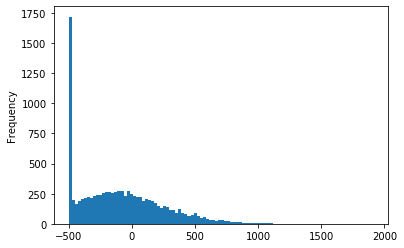

In [24]:
%matplotlib inline
df['NPV'].plot.hist(bins=100)

We can see for this "test plane" that the NPV will usually be somewhere between -500 and 1,000, with the most likely being -500. The distribution is highly skewed to the left.

### Probability Table

In [25]:
percentiles = [i/20 for i in range(1, 20)]
percentiles

[0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [26]:
df['NPV'].quantile(percentiles)

0.05   -500.000000
0.10   -500.000000
0.15   -500.000000
0.20   -438.990457
0.25   -375.978658
0.30   -321.268391
0.35   -269.004065
0.40   -219.264125
0.45   -173.628656
0.50   -128.365309
0.55    -82.613009
0.60    -34.476840
0.65     14.158348
0.70     68.433029
0.75    128.621829
0.80    194.145777
0.85    276.132291
0.90    382.713279
0.95    533.435981
Name: NPV, dtype: float64

Now apply some formatting to it.

In [27]:
df['NPV'].quantile(percentiles).apply(lambda x: f'${x:,.2f}')

0.05    $-500.00
0.10    $-500.00
0.15    $-500.00
0.20    $-438.99
0.25    $-375.98
0.30    $-321.27
0.35    $-269.00
0.40    $-219.26
0.45    $-173.63
0.50    $-128.37
0.55     $-82.61
0.60     $-34.48
0.65      $14.16
0.70      $68.43
0.75     $128.62
0.80     $194.15
0.85     $276.13
0.90     $382.71
0.95     $533.44
Name: NPV, dtype: object

## Chance of Positive/Negative NPV

We will find the chance of positive NPV by finding the percentage of cases which had a positive NPV. Then the chance of negative NPV will be 1 - (positive NPV prob), as the chance of receiving exactly 0 NPV is 0.

In [28]:
positive_npv_prob = ( df['NPV'] > 0 ).astype(int).mean()
negative_npv_prob = 1 - positive_npv_prob
print(positive_npv_prob, negative_npv_prob)

0.3626 0.6374


## Analyzing the Impacts on NPV for Different Inputs

## Plotting

We want to see whether interest rate or units has a larger effect on the NPV. A first look at this is to form some plots.

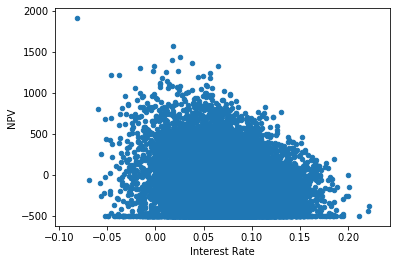

In [29]:
df.plot.scatter(x='Interest Rate', y='NPV')

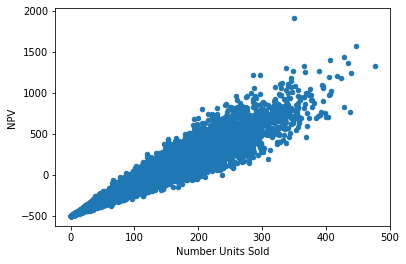

In [30]:
df.plot.scatter(x='Number Units Sold', y='NPV')

Just based off looking at the scatter plots, it seems that interest rate does not have much of an effect, while number of units sold has a very direct relation with the NPV. Because of how different the plots are, this would be enough to conclude that number of units has a greater effect. But let's take it one step further to quantify the difference.

## Regressions

Note: this is an advanced section for additional learning. We don't have time to cover this in detail in the class so you won't be required to use it for any projects.

### Run the Regression

We can use `statsmodels` to run a multivariate regression to quantify the effects of interest rate and number of units on the NPV.

In [31]:
import statsmodels.api as sm

model = sm.OLS(df['NPV'], df[['Interest Rate', 'Number Units Sold']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    NPV   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                          1.631e+04
Date:                Tue, 29 Oct 2019   Prob (F-statistic):                        0.00
Time:                        12:54:11   Log-Likelihood:                         -65523.
No. Observations:               10000   AIC:                                  1.310e+05
Df Residuals:                    9998   BIC:                                  1.311e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Interest Rate     -4632.1510     28.617   -161.867      0.000   -4688.246   -4576.056
Number Units Sold     2.8168      0.017    169.190      0.000       2.784       2.849
==============================================================================
Omnibus:                      619.874   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.864
Skew:                          -0.611   Prob(JB):                    2.22e-166
Kurtosis:                       3.579   Cond. No.                     2.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpret the Regression

#### One Unit Change

There we can see the coefficients under the `coef` column. We can also access them via `result.params`:

In [32]:
result.params

Interest Rate       -4632.150979
Number Units Sold       2.816754
dtype: float64

In [33]:
result.params['Interest Rate']

-4632.150978839354

In [34]:
print(f'Selling one additional unit leads to a ${result.params["Number Units Sold"]:,.2f} change in NPV')

Selling one additional unit leads to a $2.82 change in NPV


Also notice that because I am using quotes inside quotes there, I have used single quotes for one and double quotes for the other to avoid conflicts.

We need to be careful about the interpretation of the interest rate. As we have it in decimal, a one unit change is a 100% change. So the value we see as the coefficient is the change in NPV for a 100% change in interest rate. To get to a 1% change in interest rate, we need to divide by 100.

In [35]:
print(f'A one percent increase in interest rate leads to a ${result.params["Interest Rate"]/100:,.2f} change in NPV')

A one percent increase in interest rate leads to a $-46.32 change in NPV


#### One Standard Deviation Change

Now we know which has a greater impact by unit. A 1% increase in interest rate has a larger impact that a 1 unit increase on the NPV. This doesn't sqaure up with what we saw in the scatter plots. Why?

Just looking at a one unit change ignores what a typical change is for the different inputs. The number of units sold here is changing around a lot more than the interest rate. So even though it has a smaller impact by unit, it could have a larger impact overall once we consider how much it is changing.

We can measure how much they are changing with the standard deviation, and compare the changes for a one standard deviation change in each input to get what a typical impact would be.

In [36]:
df["Number Units Sold"].std()

87.09765854328332

In [37]:
df["Interest Rate"].std()

0.040244759572078244

We can see the standard deviation for number of units is much larger.

In [38]:
print(f'A one standard deviation increase in the number of units leads to a ${result.params["Number Units Sold"] * df["Number Units Sold"].std():,.2f} change in NPV')

A one standard deviation increase in the number of units leads to a $245.33 change in NPV


In [39]:
print(f'A one standard deviation increase in the interest rate leads to a ${(result.params["Interest Rate"] * df["Interest Rate"].std()) / 100:,.2f} change in NPV')

A one standard deviation increase in the interest rate leads to a $-1.86 change in NPV


## Putting the Analysis and Visualization Together

We just did a lot of things with the output. We will have to repeat this process for each plane simulation. So let's create a function to run all of this.

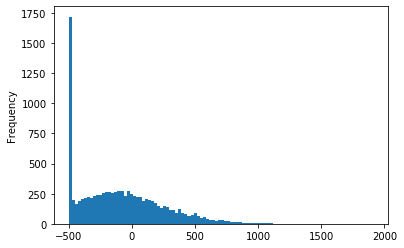

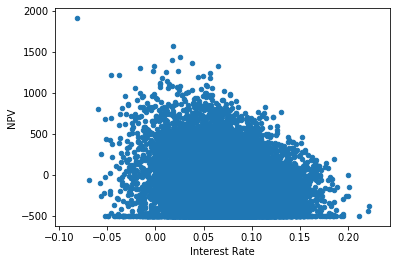

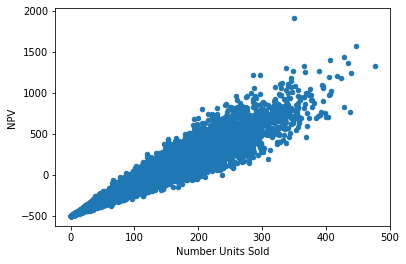

Probability Table
0.05    $-500.00
0.10    $-500.00
0.15    $-500.00
0.20    $-438.99
0.25    $-375.98
0.30    $-321.27
0.35    $-269.00
0.40    $-219.26
0.45    $-173.63
0.50    $-128.37
0.55     $-82.61
0.60     $-34.48
0.65      $14.16
0.70      $68.43
0.75     $128.62
0.80     $194.15
0.85     $276.13
0.90     $382.71
0.95     $533.44
Name: NPV, dtype: object

The expected NPV is $-87.31 with $339.09 standard deviation.

The chance of a positive NPV is 36.3% and the chance of a negative NPV is 63.7%

Regression Results
Selling one additional unit leads to a $2.82 change in NPV
A one percent increase in interest rate leads to a $-46.32 change in NPV
A one standard deviation increase in the number of units leads to a $245.33 change in NPV
A one standard deviation increase in the interest rate leads to a $-1.86 change in NPV


In [40]:
import matplotlib.pyplot as plt

def simulation_plots(df):
    df['NPV'].plot.hist(bins=100)
    df.plot.scatter(x='Interest Rate', y='NPV')
    df.plot.scatter(x='Number Units Sold', y='NPV')
    plt.show()  # show the plots as soon as this command is run
    
    
def probability_table(df):
    percentiles = [i/20 for i in range(1, 20)]
    return df['NPV'].quantile(percentiles).apply(lambda x: f'${x:,.2f}')


def expected_and_stdev_npv(df):
    mean = df['NPV'].mean()  # expected NPV
    std = df['NPV'].std()  # stdev of NPV
    return mean, std


def chance_of_positive_negative_npv(df):
    positive_npv_prob = ( df['NPV'] > 0 ).astype(int).mean()
    negative_npv_prob = 1 - positive_npv_prob
    return positive_npv_prob, negative_npv_prob


def simulation_regression(df):
    model = sm.OLS(df['NPV'], df[['Interest Rate', 'Number Units Sold']])
    result = model.fit()
    print(f'Selling one additional unit leads to a ${result.params["Number Units Sold"]:,.2f} change in NPV')
    print(f'A one percent increase in interest rate leads to a ${result.params["Interest Rate"]/100:,.2f} change in NPV')
    print(f'A one standard deviation increase in the number of units leads to a ${result.params["Number Units Sold"] * df["Number Units Sold"].std():,.2f} change in NPV')
    print(f'A one standard deviation increase in the interest rate leads to a ${(result.params["Interest Rate"] * df["Interest Rate"].std()) / 100:,.2f} change in NPV')
    
    
def simulation_summary(df):
    simulation_plots(df)
    table = probability_table(df)
    mean, std = expected_and_stdev_npv(df)
    pos_chance, neg_chance = chance_of_positive_negative_npv(df)
    print('Probability Table')
    print(table)
    print('')
    print(f'The expected NPV is ${mean:,.2f} with ${std:,.2f} standard deviation.')
    print('')
    print(f'The chance of a positive NPV is {pos_chance:.1%} and the chance of a negative NPV is {neg_chance:.1%}')
    print('')
    print('Regression Results')
    simulation_regression(df)
    
    
simulation_summary(df)
    
    


# Running the Actual Simulations for Each Plane

Now we have a function which does the full simulation, visualization, and analysis process for a plane. Now we want to repeat this for each plane.

I will also use some header formatting that I showed in the Monte Carlo Python Example.

In [41]:
from IPython.display import display, HTML

def display_header(header):
    display(HTML(f'<h2>{header}</h2>'))
    
display_header('My header')

Now actually run the simulations.

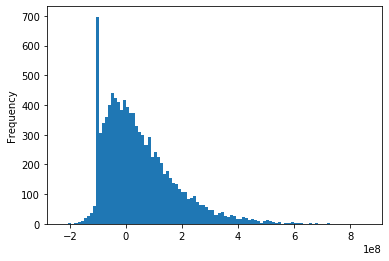

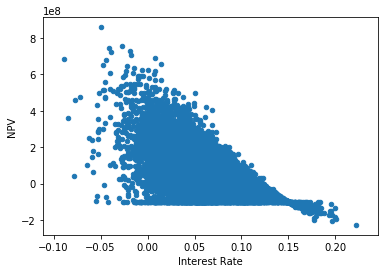

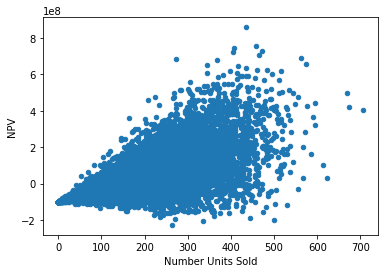

Probability Table
0.05    $-100,000,000.00
0.10     $-91,119,174.08
0.15     $-74,970,922.67
0.20     $-60,307,672.70
0.25     $-47,198,935.42
0.30     $-34,894,586.51
0.35     $-21,738,043.80
0.40      $-8,072,639.59
0.45       $5,255,518.31
0.50      $20,042,167.94
0.55      $34,412,844.05
0.60      $51,085,798.96
0.65      $69,921,145.00
0.70      $89,405,628.53
0.75     $113,475,311.79
0.80     $139,899,180.62
0.85     $174,136,913.07
0.90     $221,224,735.33
0.95     $295,966,690.38
Name: NPV, dtype: object

The expected NPV is $47,747,455.64 with $127,733,041.29 standard deviation.

The chance of a positive NPV is 57.0% and the chance of a negative NPV is 43.0%

Regression Results
Selling one additional unit leads to a $824,798.31 change in NPV
A one percent increase in interest rate leads to a $-18,038,516.81 change in NPV
A one standard deviation increase in the number of units leads to a $95,335,407.66 change in NPV
A one standard deviation increase in the interest rate leads 

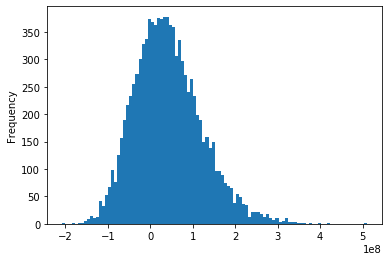

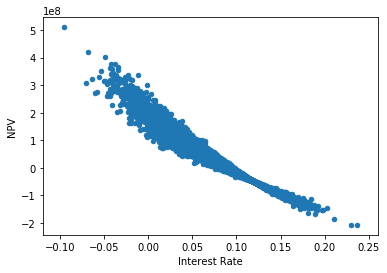

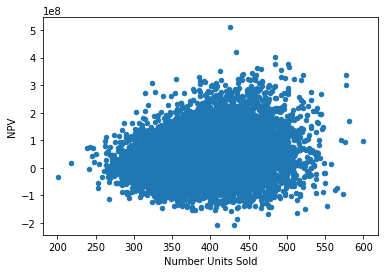

Probability Table
0.05    $-73,230,705.83
0.10    $-52,756,222.17
0.15    $-37,447,100.67
0.20    $-24,745,174.48
0.25    $-13,290,489.65
0.30     $-3,189,497.23
0.35      $6,592,584.61
0.40     $16,685,964.31
0.45     $26,141,523.45
0.50     $35,484,513.74
0.55     $45,115,442.20
0.60     $55,086,002.76
0.65     $66,118,767.01
0.70     $76,764,652.72
0.75     $90,580,887.30
0.80    $104,946,136.47
0.85    $122,484,923.64
0.90    $146,348,738.90
0.95    $183,844,741.93
Name: NPV, dtype: object

The expected NPV is $42,493,922.23 with $79,354,769.43 standard deviation.

The chance of a positive NPV is 68.4% and the chance of a negative NPV is 31.6%

Regression Results
Selling one additional unit leads to a $433,009.81 change in NPV
A one percent increase in interest rate leads to a $-18,766,908.90 change in NPV
A one standard deviation increase in the number of units leads to a $21,543,484.56 change in NPV
A one standard deviation increase in the interest rate leads to a $-748,909.11 ch

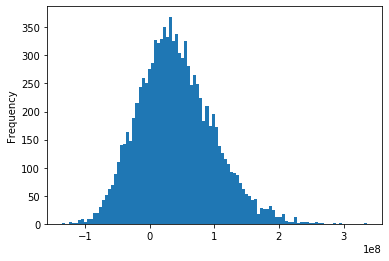

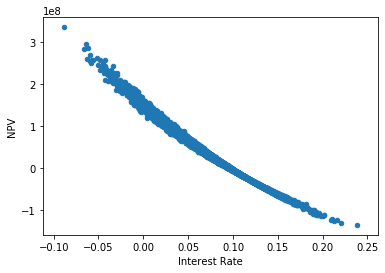

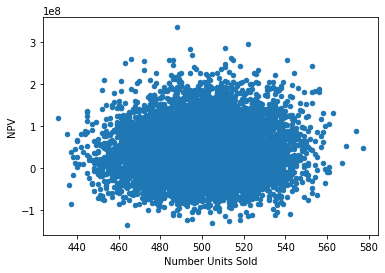

Probability Table
0.05    $-46,894,004.20
0.10    $-30,975,108.19
0.15    $-18,204,894.60
0.20     $-8,587,838.04
0.25        $438,857.00
0.30      $8,518,564.09
0.35     $15,679,104.40
0.40     $22,512,149.30
0.45     $29,529,301.19
0.50     $35,996,508.27
0.55     $43,297,006.66
0.60     $50,956,726.81
0.65     $58,560,265.14
0.70     $67,504,838.97
0.75     $76,672,996.16
0.80     $88,001,373.89
0.85    $100,441,927.16
0.90    $117,023,499.66
0.95    $142,752,836.66
Name: NPV, dtype: object

The expected NPV is $40,728,956.05 with $57,938,166.19 standard deviation.

The chance of a positive NPV is 75.3% and the chance of a negative NPV is 24.7%

Regression Results
Selling one additional unit leads to a $281,267.43 change in NPV
A one percent increase in interest rate leads to a $-14,342,266.73 change in NPV
A one standard deviation increase in the number of units leads to a $5,573,325.94 change in NPV
A one standard deviation increase in the interest rate leads to a $-573,253.77 cha

In [42]:
display_header('Super Size Plane')
df = plane_simulations(
    'Super Size',
    100000000,
    10000000,
    11500000,
    200,
    120
)
simulation_summary(df)

display_header('Large Plane')
df = plane_simulations(
    'Large',
    50000000,
    5000000,
    5600000,
    400,
    50
)
simulation_summary(df)

display_header('Mid-size Plane')
df = plane_simulations(
    'Mid-size',
    25000000,
    3000000,
    3350000,
    500,
    20
)
simulation_summary(df)

# Observations

We can see that the expected NPV increases with the size of the plane, but so does the standard deviation of the NPV and the probability of getting a negative NPV. In other words, the larger planes are riskier but also offer higher returns. The ultimate choice of plane will depend on the risk tolerance of the manufacturer.

The distribution of the super size plane looks highly skewed to the left, because there is a reasonable chance of not selling any planes. Once you are not selling any planes, the NPV doesn't change much, just a bit due to the interest rate.

The scatter plot comparing NPV to interest rate looks odd for the super size plane because so many of the NPVs are negative. Using a lower interest rate will increase the NPV if it's negative and decrease it if it's positive.

Across the board, the number of units sold is a much more important factor than the interest rate. This makes sense because everything is happening in two years. If plane sales were spread across 10 or 15 years, we would see a larger impact of the interest rate.